# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 1 балл. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [2]:
coins = pd.read_csv('coins.csv', 
                    index_col='date')
#coins['index'] = coins['date']

Посмотрим что получилось

In [7]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

In [8]:
coins.index

Index(['2013-04-28', '2013-04-28', '2013-04-29', '2013-04-29', '2013-04-30',
       '2013-04-30', '2013-05-01', '2013-05-01', '2013-05-02', '2013-05-02',
       ...
       '2018-06-06', '2018-06-06', '2018-06-06', '2018-06-06', '2018-06-06',
       '2018-06-06', '2018-06-06', '2018-06-06', '2018-06-06', '2018-06-06'],
      dtype='object', name='date', length=37588)

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [9]:
len(coins.symbol.unique())

66

#### 2. За какой период данные мы имеем? (0.4 балла)

In [10]:
coins.index[0]

'2013-04-28'

In [11]:
coins.index[-1]

'2018-06-06'

#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [12]:
pd.isnull(coins).sum()

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

In [13]:
coins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37588 entries, 2013-04-28 to 2018-06-06
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            37261 non-null  float64
 1   txCount          36068 non-null  float64
 2   txVolume         35758 non-null  float64
 3   activeAddresses  36068 non-null  float64
 4   symbol           37588 non-null  object 
 5   name             37588 non-null  object 
 6   open             37588 non-null  float64
 7   high             37588 non-null  float64
 8   low              37588 non-null  float64
 9   close            37588 non-null  float64
 10  volume           37588 non-null  float64
 11  market           37588 non-null  float64
dtypes: float64(10), object(2)
memory usage: 3.7+ MB


#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [14]:
coins[coins['high'] == max(coins['high'])]

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


In [15]:
coins[coins['high'] == max(coins['high'])].index[0]

'2017-12-17'

In [16]:
coins[coins['high'] == max(coins['high'])].symbol

date
2017-12-17    BTC
Name: symbol, dtype: object

#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

Самая низкая капитализация CTXC 10935015000.0
Самая высокая капитализация BTC 57439466431000.0


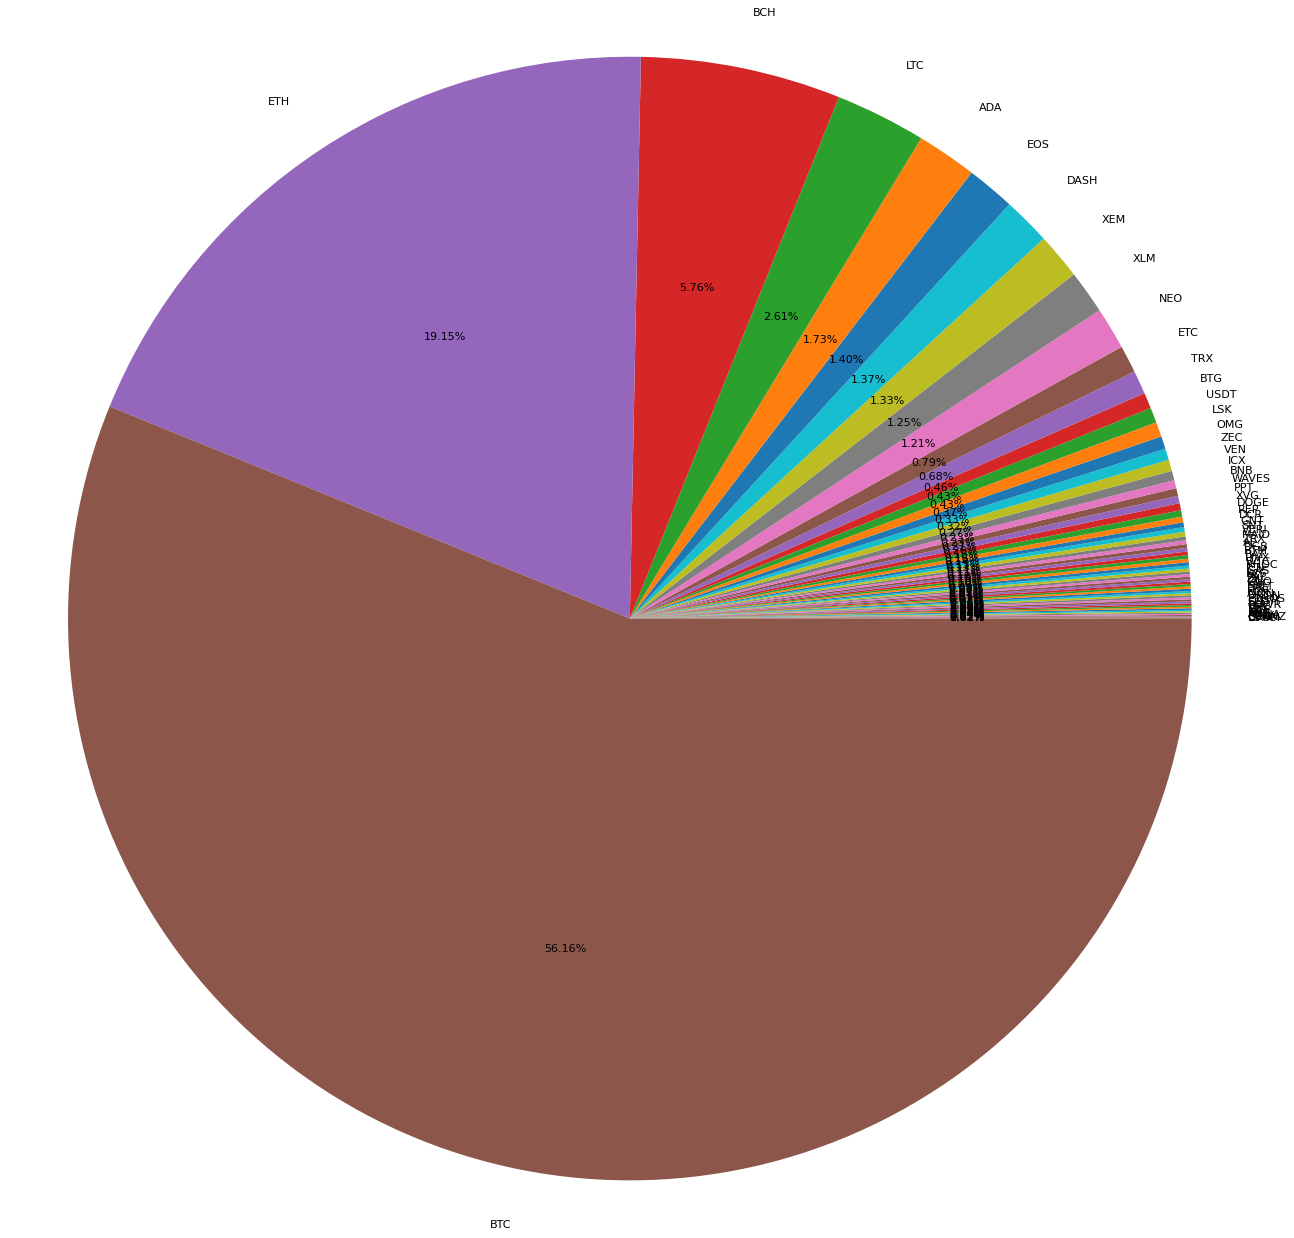

In [17]:
our_df = coins[['symbol', 'market']]
ans = {}
for item in our_df.symbol:
  ans[item] = 0

for key, value in ans.items():
  ans[key] = our_df[our_df['symbol'] == key].market.sum()
ans = sorted(ans.items(), key = lambda item: item[1])
print('Самая низкая капитализация', ans[0][0], ans[0][1])
print('Самая высокая капитализация', ans[-1][0], ans[-1][1])

values = []
labels = []
for i in ans:
  values.append(i[1])
  labels.append(i[0])

fig1, ax1 = plt.subplots(figsize = (20, 20), dpi = 80)

 
wedges, texts, autotexts = ax1.pie(values, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [18]:
!pip install mpl_finance

In [5]:
import plotly.graph_objects as go
from datetime import datetime

def plot_fancy_price_action(coins, symbol, start_date, end_date):

    data1 = coins[(coins['symbol'] == symbol) & (start_date <= coins.index) & (coins.index <= end_date)]
    fig = go.Figure(data=[go.Candlestick(x=data1.index,
                  open=data1.open, high=data1.high,
                  low=data1.low, close=data1.close)
                      ])

    fig.update_layout(xaxis_rangeslider_visible=False,
                      title='Визуализации цен ' + symbol + ' валюты за выбранный диапазон дат ' + start_date + ' ' + end_date,
                      yaxis_title='Стоимость',
                      xaxis_title='Дата',
                      )
    fig.show()

In [20]:
'''import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt


def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = coins[(coins['symbol'] == symbol) & (start_date <= coins.index) & (coins.index <= end_date)]
    #date, closep, highp, lowp, openp, volume = mdates.date2num(data.index.to_pydatetime()), data.close, data.high, data.low, data.open, data.volume
    fig, ax = plt.subplots(figsize = (100, 60))
    fig.subplots_adjust(bottom=0.2)
    # ax.xaxis.set_minor_formatter(dayFormatter)
    ax.tick_params(labelsize=40)

    # plot_day_summary(ax, quotes, ticksize=3)
    candlestick_ohlc(ax, zip(mdates.date2num(data.index.to_pydatetime()),
                            data['open'], data['high'],
                            data['low'], data['close']),
                    width=0.6)

    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    
    plt.show()
'''


"import matplotlib.ticker as mticker\nfrom mpl_finance import candlestick_ohlc\nimport matplotlib.dates as mdates\nimport datetime as dt\n\n\ndef plot_fancy_price_action(coins, symbol, start_date, end_date):\n    data = coins[(coins['symbol'] == symbol) & (start_date <= coins.index) & (coins.index <= end_date)]\n    #date, closep, highp, lowp, openp, volume = mdates.date2num(data.index.to_pydatetime()), data.close, data.high, data.low, data.open, data.volume\n    fig, ax = plt.subplots(figsize = (100, 60))\n    fig.subplots_adjust(bottom=0.2)\n    # ax.xaxis.set_minor_formatter(dayFormatter)\n    ax.tick_params(labelsize=40)\n\n    # plot_day_summary(ax, quotes, ticksize=3)\n    candlestick_ohlc(ax, zip(mdates.date2num(data.index.to_pydatetime()),\n                            data['open'], data['high'],\n                            data['low'], data['close']),\n                    width=0.6)\n\n    ax.xaxis_date()\n    ax.autoscale_view()\n    plt.setp(plt.gca().get_xticklabels(), rota

Посмотрим, что получилось:

In [21]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [22]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    data1 = coins[(coins['symbol'] == symbol) & (start_date <= coins.index) & (coins.index <= end_date)]
    data1 = data1.assign(pnd = lambda x: (x['high'] / np.maximum(x['open'], x['close'])))
    return data1[data1['pnd'] == max(data1['pnd'])]

In [23]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market,pnd
date,,,,,,,,,,,,,
2017-11-29,10077.4,397917.0,2.845830e+10,1131747.0,BTC,Bitcoin,10077.4,11517.4,9601.03,9888.61,1.156880e+10,1.683670e+11,1.142894


#### Сравните эти значения для разных монет.

In [24]:
d = {}
for i in coins.symbol.unique():
  symbol = find_most_severe_pump_and_dump(coins, symbol=i, start_date='2017-06-01', end_date='2018-06-01')['symbol'][0]
  pnd = find_most_severe_pump_and_dump(coins, symbol=i, start_date='2017-06-01', end_date='2018-06-01')['pnd'][0]
  d[symbol] = pnd
sorted(d.items(), key=lambda x: x[1])


[('USDT', 1.099009900990099),
 ('LTC', 1.1082257158899496),
 ('XEM', 1.1358695652173911),
 ('CTXC', 1.1428571428571428),
 ('BTC', 1.1428940004366206),
 ('ETH', 1.1433508255471652),
 ('ETC', 1.1482493171095107),
 ('NAS', 1.1758241758241759),
 ('BNB', 1.176079734219269),
 ('CENNZ', 1.177753188596324),
 ('DASH', 1.2031621370259378),
 ('DRGN', 1.211764705882353),
 ('SALT', 1.227206946454414),
 ('NEO', 1.232142857142857),
 ('BAT', 1.2342492522991364),
 ('ICX', 1.2538461538461536),
 ('WAVES', 1.2543352601156068),
 ('ZRX', 1.254990051045648),
 ('VEN', 1.2713567839195978),
 ('DOGE', 1.2747326203208555),
 ('ELF', 1.2808988764044942),
 ('ADA', 1.29064039408867),
 ('MAID', 1.291362434422475),
 ('EOS', 1.3202933985330074),
 ('KCS', 1.3243755975664018),
 ('ZEC', 1.3298776561493881),
 ('OMG', 1.3312148056585635),
 ('XLM', 1.3325105113251052),
 ('PAY', 1.3514021619927934),
 ('PIVX', 1.3587962962962963),
 ('DGB', 1.359942799461642),
 ('ENG', 1.3618677042801557),
 ('AION', 1.3624161073825503),
 ('POWR'

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [25]:
def compute_roi_avg_avg(coins, investments, start_date, end_date):
    # Paste your code here
    start_summ = 0
    end_summ = 0
    kol_value = 0
    for key, value in investments.items():
      start_summ += value
      kol_value = (value / coins[(coins.index == start_date) & (coins.symbol == key)]['price'])[0]
      end_summ += (kol_value * coins[(coins.index == end_date) & (coins.symbol == key)]['price'])[0]
    return ((end_summ - start_summ) / start_summ)

In [26]:
def compute_roi_min_max(coins, investments, start_date, end_date):
    # Paste your code here
    start_summ = 0
    end_summ = 0
    kol_value = 0
    for key, value in investments.items():
      start_summ += value
      kol_value = (value / coins[(coins.index == start_date) & (coins.symbol == key)]['low'])[0]
      end_summ += (kol_value * coins[(coins.index == end_date) & (coins.symbol == key)]['high'])[0]
    return ((end_summ - start_summ) / start_summ)

In [27]:
compute_roi_avg_avg(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [28]:
compute_roi_avg_avg(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

In [29]:
compute_roi_min_max(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.08882047798238273

In [30]:
compute_roi_min_max(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

53.24784979120092

## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [90]:
!pip install plotly -U

     |████████████████████████████████| 13.2MB 295kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [6]:
from plotly.subplots import make_subplots

pd.options.plotting.backend = "plotly"
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here
    data = coins[coins.symbol == symbol][['price']]
    data_rolling = data.rolling(window=window).mean()
    data_std = data.rolling(window=window).std()
    
    #fig = data.plot()
    trace1 = go.Scatter(
        x=data.index,
        y=data['price'],
        name='Price',
    )
    trace2 = go.Scatter(
        x=data_rolling.index,
        y=data_rolling['price'],
        name='Rolling Price',
    )
    trace3 = go.Scatter(
        x=data_rolling.index,
        y=data_rolling['price'] + width * data_std['price'],
        name='Граница Боллинджера hign',
    )
    trace4 = go.Scatter(
        x=data_rolling.index,
        y=data_rolling['price'] - width * data_std['price'],
        name='Граница Боллинджера low',
    )
    

    fig = go.Figure()
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3)
    fig.add_trace(trace4)
    
    fig['layout'].update(height = 600, 
                         width = 800, 
                         title = 'График цены, скользящее среднее и границы Боллинджера c параметрами N (window) = 21, K (width) = 2', 
                         xaxis=dict(tickangle=-45),
                         hovermode="x",
                         xaxis_title="Даты",
                         yaxis_title="Стоимость в долларах",)

    #fig.add_trace(data_rolling)
    fig.show()

In [7]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

Да, выполнялось, но иногда есть выходы за верхнюю границу

In [22]:
'''data_for_percent = coins[['market']]
data = data_for_percent.apply(lambda x: data_for_percent[data_for_percent.index == x.index]['market'].sum())

data'''

market    1.022750e+14
dtype: float64

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [29]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here
    traces = []
    for symb in symbols:
      data = coins[(coins.symbol == symb) & (coins.index >= start_date)][['market']]
      traces.append(go.Scatter(
        x=data.index,
        y=data['market'],
        name=symb))
    
    fig = make_subplots(rows=2, cols=1)

    for trace in traces:
      fig.add_trace(trace, row=1, col=1)
    fig['layout'].update(height = 600, 
                         width = 800, 
                         title = 'Капитализация BTC, ETH, EOS, BCH, XLM, LTC', 
                         xaxis=dict(tickangle=-45),
                         hovermode="x",
                         xaxis_title="Даты",
                         yaxis_title="Капитализация в долларах")
    traces = []
    
    for symb in symbols:
      data = coins[(coins.symbol == symb) & (coins.index >= start_date)][['market']]
      data_for_percent = coins[['market']]
      data['per_cent_market'] = data.apply(lambda x: x / data[data.index == x.index]['market'].sum())
      traces.append(go.Scatter(
        x=data.index,
        y=data['per_cent_market'],
        name=symb))
    

    for trace in traces:
      fig.add_trace(trace, row=2, col=1)
    
    fig.update_xaxes(title='Даты', row=2, col=1)
    fig.update_yaxes(title='Доли капитализаций', row=2, col=1)

    


    #fig.add_trace(data_rolling)
    fig.show()

In [30]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Графики капитализации обеих вылют очень похожи, наверное, у алькоинов есть прямая зависимость от биткоина и его курса/капитализации и тп


## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [80]:
from datetime import timedelta, datetime

def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here
    data = coins[['symbol', 'market']]
    data.ewm(alpha=0.5, adjust=False).mean()
    start_day = str(datetime.strptime(date, "%Y-%m-%d") - timedelta(days=21))[:10]
    data = data[(data['symbol'].isin(symbols)) & (data.index >= start_day) & (data.index <= date)]
    #print(datetime.strptime(date, "%Y-%m-%d") - timedelta(days=window))
    new_data = pd.DataFrame(index=data.index.unique())
    for symb in symbols:
      new_data[symb] = data[data.symbol == symb]['market'] 
    new_data = new_data.ewm(alpha=alpha, adjust=False).mean()
    return new_data.corr()

In [82]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)

correlations

correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,1.00,-0.08,0.99,0.99,1.00,0.99
ETH,1.00,1.00,-0.08,0.99,0.98,1.00,0.98
EOS,-0.08,-0.08,1.00,-0.03,-0.04,-0.07,0.02
BCH,0.99,0.99,-0.03,1.00,1.00,1.00,0.99
XLM,0.99,0.98,-0.04,1.00,1.00,0.99,0.99
LTC,1.00,1.00,-0.07,1.00,0.99,1.00,0.99
ADA,0.99,0.98,0.02,0.99,0.99,0.99,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [83]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.87,0.83,0.66,0.85,0.93,0.78
ETH,0.87,1.00,0.99,0.93,0.99,0.99,0.97
EOS,0.83,0.99,1.00,0.96,1.00,0.97,0.99
BCH,0.66,0.93,0.96,1.00,0.94,0.87,0.97
XLM,0.85,0.99,1.00,0.94,1.00,0.97,0.99
LTC,0.93,0.99,0.97,0.87,0.97,1.00,0.93
ADA,0.78,0.97,0.99,0.97,0.99,0.93,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

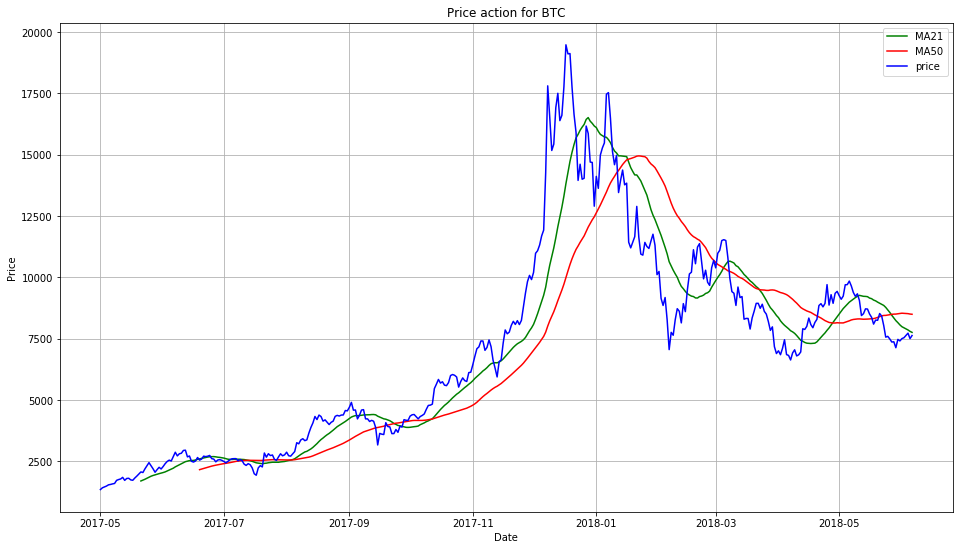

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.